In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/makine/fenerbahce1.csv");


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=pd.DataFrame(data['tweet'])


In [ ]:
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#[A-Za-z0-9]+','',text)
    text=re.sub(r'@_[A-Za-z0-9]+','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'1','',text)
    text=re.sub(r'2','',text)
    text=re.sub(r'3','',text)
    text=re.sub(r'4','',text)
    text=re.sub(r'5','',text)
    text=re.sub(r'6','',text)
    text=re.sub(r'7','',text)
    text=re.sub(r'8','',text)
    text=re.sub(r'9','',text)
    text=re.sub(r'0','',text)
    return text
df['tweet']=df['tweet'].apply(cleanTxt)

In [ ]:
df['tweet']=df['tweet'].str.replace("[^a-zA-Z0-9 \n\.]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install emoji
import emoji
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)
df['tweet']=df['tweet'].apply(remove_emoji)

In [ ]:
import numpy as np
import tensorflow as tf
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


In [ ]:
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')

In [ ]:
def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc
df['tweet'] = df['tweet'].apply(lambda x: token(x))

In [ ]:
with open('/content/drive/MyDrive/makine_final/temizlenmis_tweetler.csv', 'w',encoding="utf-8") as f:
    for line in df['tweet'] :
        f.write(line)
        f.write('\n')
f.close()

In [ ]:
from nltk import word_tokenize
toke=df['tweet'].apply(word_tokenize)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(df['tweet'])
tokenizer.word_index


In [ ]:
all_words = [word for tokens in toke for word in tokens]
tweet_lengths = [len(tokens) for tokens in toke]
vocab = sorted(list(set(all_words)))

print('{} Total Kelime sayısı, Kelime hazinesi {}'.format(len(all_words), len(vocab)))
print('En uzun tweet {}'.format(max(tweet_lengths)))

323467 Total Kelime sayısı, Kelime hazinesi 56094
En uzun tweet 56


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


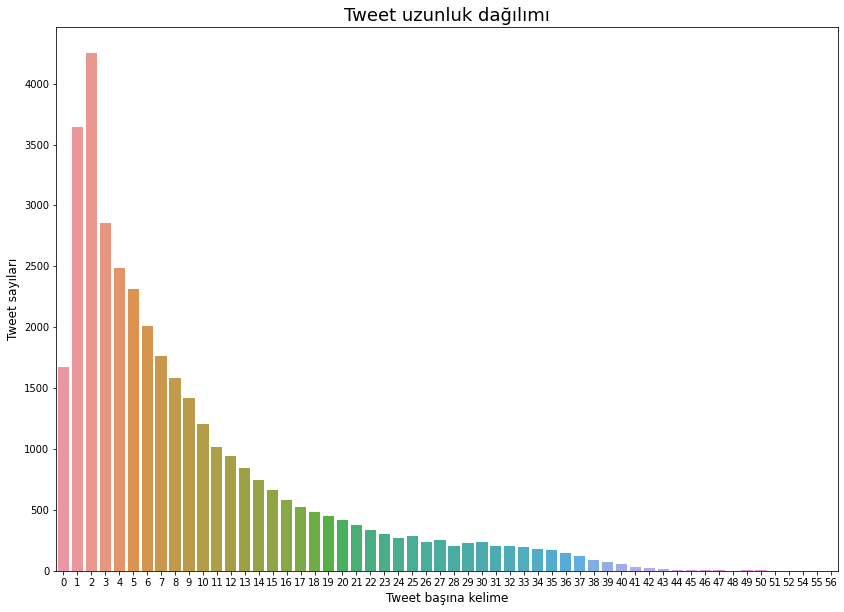

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,10))
sns.countplot(tweet_lengths)
plt.title('Tweet uzunluk dağılımı', fontsize = 18)
plt.xlabel('Tweet başına kelime', fontsize = 12)
plt.ylabel('Tweet sayıları', fontsize = 12)
plt.show()

In [ ]:
from nltk.probability import FreqDist
flat_words = [item for sublist in toke for item in sublist]
word_freq = FreqDist(flat_words)
word_freq.most_common(30)

In [ ]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]
top_30_dictionary = dict(zip(most_common_word, most_common_count))

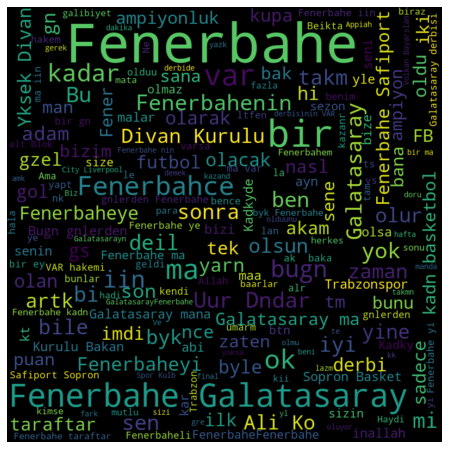

In [ ]:
words="".join([sentence for sentence in df['tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=800,random_state=42,max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install deep_translator

In [ ]:
import nltk
df['tokenized_sents'] = df.apply(lambda row: nltk.sent_tokenize(row['tweet']), axis=1)

In [ ]:
df_split = df.sample(frac=0.3,random_state=200)#datalar çok yüksek sayıda olduğu için random bir şekilde seçildi
df_split.reset_index()

In [ ]:
from deep_translator import GoogleTranslator
def translate(text):
    return GoogleTranslator(source='turkish', target='en').translate(text)
df_split['clean_english']=pd.DataFrame(df_split.tweet.apply(lambda x : translate(x)))#seçilen twitler etiketlenmek için ingilizce diline çevrildi

In [ ]:
df_split.to_csv('/content/drive/MyDrive/makine_final/translated_tweets.csv',index=None)#çevrilen twitler kayıt edildi

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/makine_final/translated_tweets.csv')#yeni oluşturulan datanın kullanılması
df_split=pd.DataFrame(data)#dataframe çevrilmesi
pol=[]#polarity saklanma
from textblob import TextBlob
for yazi in df_split['clean_english'].astype(str):
  y_Blob=TextBlob(yazi)
  pol.append(y_Blob.polarity)
df_split['pol']=pol

In [ ]:
import numpy as np

df_split['negPos'] = np.select([df_split['pol'] > 0, df_split['pol'] == 0], ["Positive", "Neutral"], "Negative")


In [ ]:
df_split.to_csv('/content/drive/MyDrive/makine_final/translated_tweets.csv',index=None)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',lowercase=True)
tfidf = vectorizer.fit_transform(df_split['clean_english'].astype(str))
tfidf.shape

(10838, 10437)

In [ ]:
import pandas as pd
data_22=pd.read_csv('/content/drive/MyDrive/makine_final/translated_tweets_vader.csv')
df_split=pd.DataFrame(data_22)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_split['tweet'], df_split['negPos'], random_state=42, train_size = .8)

In [ ]:
sent_train_vector=vectorizer.fit_transform(X_train.astype(str))
sent_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
model=clf.fit(X=sent_train_vector.toarray(),y=y_train)


In [ ]:
sent_test=vectorizer.transform(['kazanmak'])
print(sent_test)

  (0, 9838)	1.0


In [ ]:
y_pred=model.predict(sent_test.toarray())
y_pred

array(['Positive'], dtype='<U8')

In [ ]:
import pandas as pd
data_22=pd.read_csv('/content/drive/MyDrive/makine_final/translated_tweets_vader.csv')
df_22=pd.DataFrame(data_22)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_split['negPos'],y_test))

ValueError: ignored

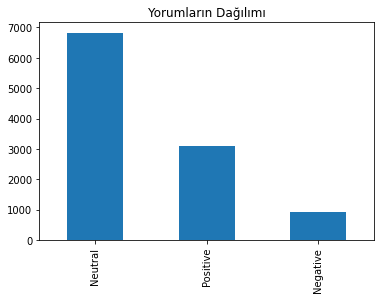

In [ ]:
df_split.negPos.value_counts().plot(kind='bar',title="Yorumların Dağılımı")


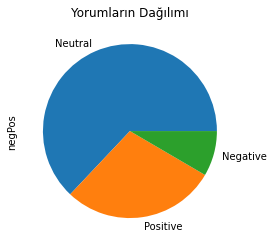

In [ ]:
df_split.negPos.value_counts().plot(kind='pie',title="Yorumların Dağılımı")


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_split['scores'] = df_split['clean_english'].astype(str).apply(lambda new_text: sid.polarity_scores(new_text))
#textblop ile karşılaştırmak için vader classification


In [ ]:
df_split['compound'] = df_split['scores'].apply(lambda score_dict: score_dict['compound'])
df_split['sentimen_vader']=''
df_split.loc[df_split.compound>0,'sentimen_vader']='Positive'
df_split.loc[df_split.compound==0,'sentimen_vader']='Neutral'
df_split.loc[df_split.compound<0,'sentimen_vader']='Negative'

In [ ]:
df_split['sentimen_vader'].value_counts()#vader ile classificationda çıkan sonuç


Neutral     5744
Positive    3662
Negative    1432
Name: sentimen_vader, dtype: int64

In [ ]:
df_split['negPos'].value_counts()#textblob ile classificationda çıkan sonuç

Neutral     6823
Positive    3103
Negative     912
Name: negPos, dtype: int64

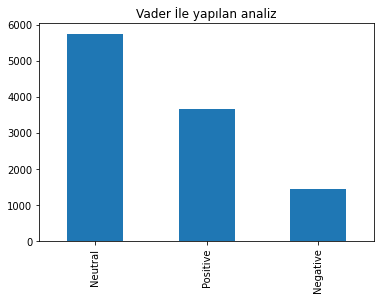

In [ ]:
df_split.sentimen_vader.value_counts().plot(kind='bar',title="Vader İle yapılan analiz")

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df_split['negPos'],df_split['sentimen_vader'])


0.7339915113489573

In [ ]:
print(classification_report(df_split['negPos'],df_split['sentimen_vader']))

              precision    recall  f1-score   support

    Negative       0.31      0.48      0.38       912
     Neutral       0.90      0.76      0.82      6823
    Positive       0.65      0.76      0.70      3103

    accuracy                           0.73     10838
   macro avg       0.62      0.67      0.63     10838
weighted avg       0.78      0.73      0.75     10838



In [ ]:
cm_pred = confusion_matrix(df_split['negPos'],df_split['sentimen_vader'])
print(cm_pred)


[[ 441  184  287]
 [ 658 5152 1013]
 [ 333  408 2362]]


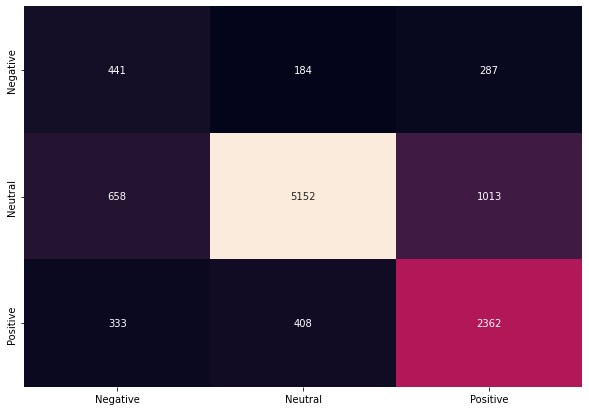

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative", "Neutral", "Positive"]],
                          columns = [i for i in ["Negative", "Neutral", "Positive"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")


In [ ]:
df_split.to_csv('/content/drive/MyDrive/makine_final/translated_tweets_vader.csv',index=None)

In [ ]:
import pandas as pd

data_2=pd.read_csv('/content/drive/MyDrive/makine_final/translated_tweets_vader.csv')
df_2=pd.DataFrame(data_2)


In [ ]:
df_2

,tweet,tokenized_sents,clean_english,negPos,pol,scores,compound,sentimen_vader
0,Kullanc adm kraladam Tahminim Fenerbahe Galata...,['Kullanc adm kraladam Tahminim Fenerbahe Gala...,Username is kingman My guess is Fenerbahe Gala...,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,sezer t Gnaydn hayrl gnler ASL Fenerbahe cumhu...,['sezer t Gnaydn hayrl gnler ASL Fenerbahe cum...,Sezer t Gnayd have a good day ASL Fenerbahe re...,Positive,0.700000,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404,Positive
2,Bu kadar favori iken hi kazanamadk .. nallah y...,['Bu kadar favori iken hi kazanamadk .. nallah...,We never won when we were such a favorite.. I ...,Neutral,0.000000,"{'neg': 0.201, 'neu': 0.604, 'pos': 0.195, 'co...",-0.0253,Negative
3,Fenerbahe li olan MUSTAFA KEMAL mi,['Fenerbahe li olan MUSTAFA KEMAL mi'],Is it MUSTAFA KEMAL from Fenerbahe?,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Futbolun Heyecan Yaanr Derbiye zel evrimsiz Bo...,['Futbolun Heyecan Yaanr Derbiye zel evrimsiz ...,Football's Excitement Continue with Derby-Spec...,Positive,0.400000,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...",0.9136,Positive
...,...,...,...,...,...,...,...,...
10833,Yarn akam Fenerbahe Twitter hesab,['Yarn akam Fenerbahe Twitter hesab'],Tomorrow Fenerbahe Twitter account,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
10834,NaN,[],NaN,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
10835,sarayi Fenerbahe temiz olmad ynnde bir ceza sp...,['sarayi Fenerbahe temiz olmad ynnde bir ceza ...,Please let us know if there is a penalty sport...,Neutral,0.000000,"{'neg': 0.184, 'neu': 0.675, 'pos': 0.141, 'co...",-0.1779,Negative
10836,Fenerbahce,['Fenerbahce'],Fenerbahce,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_2, test_size=0.2,random_state=16)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8670
Test Data size 2168


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()


In [ ]:
tokenizer.fit_on_texts(train_data.tweet.astype(str))
word_index = tokenizer.word_index
print(word_index)

{'fenerbahe': 1, 'galatasaray': 2, 'bir': 3, 'ma': 4, 'var': 5, 'nan': 6, 'iin': 7, 'bugn': 8, 'e': 9, 'ok': 10, 'fenerbahce': 11, 'bu': 12, 'olsun': 13, 'yok': 14, 'son': 15, 'gnlerden': 16, 'gn': 17, 'kadar': 18, 'takm': 19, 'derbi': 20, 'byk': 21, 'fenerbahenin': 22, 'uur': 23, 'sen': 24, 'ali': 25, 'bilet': 26, 'oldu': 27, 'u': 28, 'mi': 29, 'ben': 30, 'olur': 31, 'bakan': 32, 'ampiyon': 33, 'fenerbahegalatasaray': 34, 'gol': 35, 'm': 36, 'iyi': 37, 'sonra': 38, 'deil': 39, 'gs': 40, 'olarak': 41, 'puan': 42, 'dndar': 43, 'divan': 44, 'olan': 45, 'yarn': 46, 'ko': 47, 'yine': 48, 'a': 49, 'baarlar': 50, 'bi': 51, 'zaman': 52, 'final': 53, 'fenerbaheye': 54, 'bile': 55, 'nasl': 56, 'man': 57, 'akam': 58, 'kazanr': 59, 'adam': 60, 'fenerbaheyi': 61, 'gzel': 62, 'taraftar': 63, 'safiport': 64, 'yi': 65, 'alr': 66, 'byle': 67, 'olacak': 68, 'artk': 69, 'yksek': 70, 'spor': 71, 'ilk': 72, 'tek': 73, 'st': 74, 'bizim': 75, 'hi': 76, 'benim': 77, 'trabzonspor': 78, 'sopron': 79, 'kurulu':

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(" kelime hazinesi :", vocab_size)


 kelime hazinesi : 18811


In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet.astype(str)),maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet.astype(str)),maxlen = 30)


In [ ]:
labels = ['Negative', 'Positive']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.negPos.to_list())
y_train = encoder.transform(train_data.negPos.to_list())
y_test = encoder.transform(test_data.negPos.to_list())
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
embeddings_index = {}
f = open('/content/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('bulunan kelime vektör %s .' %len(embeddings_index))


bulunan kelime vektör 400000 .


In [ ]:
# creating an matrix with zeroes of shape vocab x embedding dimension
embedding_matrix = np.zeros((vocab_size, 300))
# Iterate through word, index in the dictionary
for word, i in word_index.items():
    # extract the corresponding vector for the vocab indice of same word
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,300,weights=[embedding_matrix],
                                          input_length=30,trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from keras import optimizers
from keras import callbacks


In [ ]:
model.compile(optimizer=optimizers.adam_v2.Adam(learning_rate=0.2), loss='binary_crossentropy',metrics=['accuracy'])
ReduceLROnPlateau = callbacks.ReduceLROnPlateau(factor=0.1,min_lr = 0.01, monitor = 'val_loss',verbose = 1)

In [ ]:
training = model.fit(x_train, y_train, batch_size=1024, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
9/9 [==============================] - 21s 1s/step - loss: -403926.6250 - accuracy: 0.5842 - val_loss: -2486419.2500 - val_accuracy: 0.6342 - lr: 0.2000
Epoch 2/10
9/9 [==============================] - 9s 1s/step - loss: -9455506.0000 - accuracy: 0.6284 - val_loss: -26960222.0000 - val_accuracy: 0.6342 - lr: 0.2000
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: -56926204.0000 - accuracy: 0.6284 - val_loss: -119436936.0000 - val_accuracy: 0.6342 - lr: 0.2000
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: -208299472.0000 - accuracy: 0.6284 - val_loss: -361939904.0000 - val_accuracy: 0.6342 - lr: 0.2000
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: -556161280.0000 - accuracy: 0.6284 - val_loss: -869583424.0000 - val_accuracy: 0.6342 - lr: 0.2000
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: -1241621504.0000 - accuracy: 0.6284 - val_loss: -1804513280.0000 - val_accuracy: 0.6342 - lr: 0

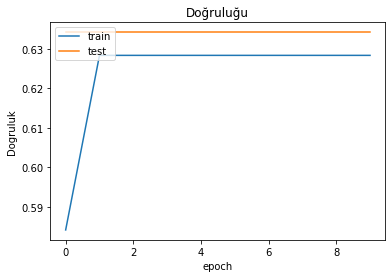

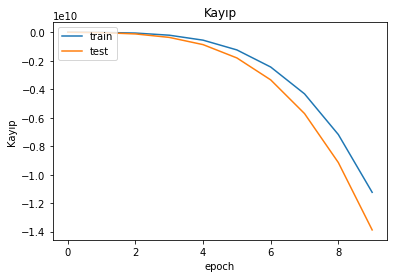

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Doğruluğu')
plt.ylabel('Dogruluk')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Kayıp')
plt.ylabel('Kayıp')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def predict_tweet_sentiment(score):
    return "Positive" if score>0.5 else "Negative"
scores = model.predict(x_test, verbose=1, batch_size=10000)
model_predictions = [predict_tweet_sentiment(score) for score in scores]


1/1 [==============================] - 2s 2s/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.negPos), model_predictions))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       181
     Neutral       0.00      0.00      0.00      1375
    Positive       0.28      1.00      0.44       612

    accuracy                           0.28      2168
   macro avg       0.09      0.33      0.15      2168
weighted avg       0.08      0.28      0.12      2168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

data_3=pd.read_csv('/content/drive/MyDrive/makine_final/translated_tweets_vader.csv')
df_3=pd.DataFrame(data_3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vect=CountVectorizer(ngram_range=(1,2)).fit(df_3['tweet'].values.astype('U'))
logreg=LogisticRegression()
X=df_3['tweet'].values.astype('U')
Y=df_3['negPos']
X=vect.transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

logreg.fit(x_train,y_train)
logreg_prec=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_prec,y_test)
logreg_acc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7809040590405905

In [ ]:
confusion_matrix(y_test,logreg_prec)

array([[  26,   93,   49],
       [  16, 1288,   78],
       [  20,  219,  379]])

In [ ]:
print(classification_report(y_test,logreg_prec))

              precision    recall  f1-score   support

    Negative       0.42      0.15      0.23       168
     Neutral       0.81      0.93      0.86      1382
    Positive       0.75      0.61      0.67       618

    accuracy                           0.78      2168
   macro avg       0.66      0.57      0.59      2168
weighted avg       0.76      0.78      0.76      2168

